# Forecast Stocks

<font size="5">Outline</font>

<p style='text-align: justify;'>Embarking on a project to predict stock prices, we harness the power of the Long-Short Term Memory (LSTM) algorithm. Our analysis is enriched by a two-year historical dataset from prominent companies including Apple, Microsoft, Nvidia, Broadcom, Oracle, Adobe, and Salesforce. By utilizing LSTM, a robust recurrent neural network, we aim to uncover meaningful patterns and insights to enhance stock price forecasting accuracy. </p>

<font size="3">Dataset:</font>
<p style='text-align: justify;'>Extracted using crawler from Yahoo Finance</p>


In [305]:
from IPython.display import Markdown

In [306]:
Markdown("""
Data source: yfinance\n
- AAPL (01/01/2021 - 31/12/2023)\n
- MSFT (01/01/2021 - 31/12/2023)\n
- NVDA (01/01/2021 - 31/12/2023)\n
- AVGO (01/01/2021 - 31/12/2023)\n
- ORCL (01/01/2021 - 31/12/2023)\n
- ADBE (01/01/2021 - 31/12/2023)\n
- CRM (01/01/2021 - 31/12/2023)\n
""")


Data source: yfinance

- AAPL (01/01/2021 - 31/12/2023)

- MSFT (01/01/2021 - 31/12/2023)

- NVDA (01/01/2021 - 31/12/2023)

- AVGO (01/01/2021 - 31/12/2023)

- ORCL (01/01/2021 - 31/12/2023)

- ADBE (01/01/2021 - 31/12/2023)

- CRM (01/01/2021 - 31/12/2023)



# Import Libraries

In [307]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from IPython.display import Markdown
from datetime import datetime
import textwrap

# StandardScaler and IsolationForest for detect outlier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# LSTM for forecasting
from keras.models import Sequential
from keras.layers import Dense, LSTM

# yfinance for crawling data
import yfinance as yf

sns.set_theme(style="whitegrid")

In [308]:
# defining wrap_labels for wrapping a few of labels that overidding the chart
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [309]:
# creat a few of lists that contains stock code, list, and moving average values
stock_list = ['aapl', 'msft', 'nvda', 'avgo', 'orcl', 'adbe', 'crm']
stock_code = ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL', 'ADBE', 'CRM']
stock_ma = ['aapl_ma', 'msft_ma', 'nvda_ma', 'avgo_ma', 'orcl_ma', 'adbe_ma', 'crm_ma']
com_list = []

# read data from local dir
for x, y, z in zip(stock_list, stock_code, stock_ma):
    globals()[x] = pd.read_csv(f'data//{y}_15_01_2024.csv', encoding='utf-8')
    globals()[x]['Date'] = pd.to_datetime(globals()[x]['Date'])
    globals()[x]['Volume'] = globals()[x]['Volume'].astype(int)
    globals()[z] = globals()[x]
    globals()[z] =  globals()[z].set_index('Date')
    com_list.append(globals()[z])
             
df = pd.concat(com_list, axis=0)

aapl.head()

,Date,Open,High,Low,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,127.164185,143301900
1,2021-01-05,128.889999,131.740005,128.429993,128.736389,97664900
2,2021-01-06,127.720001,131.050003,126.379997,124.402916,155088000
3,2021-01-07,128.360001,131.630005,127.860001,128.647949,109578200
4,2021-01-08,132.429993,132.630005,130.229996,129.758362,105158200


In [310]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       503 non-null    datetime64[ns]
 1   Open       503 non-null    float64       
 2   High       503 non-null    float64       
 3   Low        503 non-null    float64       
 4   Adj Close  503 non-null    float64       
 5   Volume     503 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 21.7 KB


# Exploratory Data Analysis

In [311]:
chart = f'Open Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, {stock_code[3]}, {stock_code[4]}, and {stock_code[5]} 2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Open Price AAPL, MSFT, NVDA, AVGO, ORCL, and ADBE 2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\2003665309.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5)


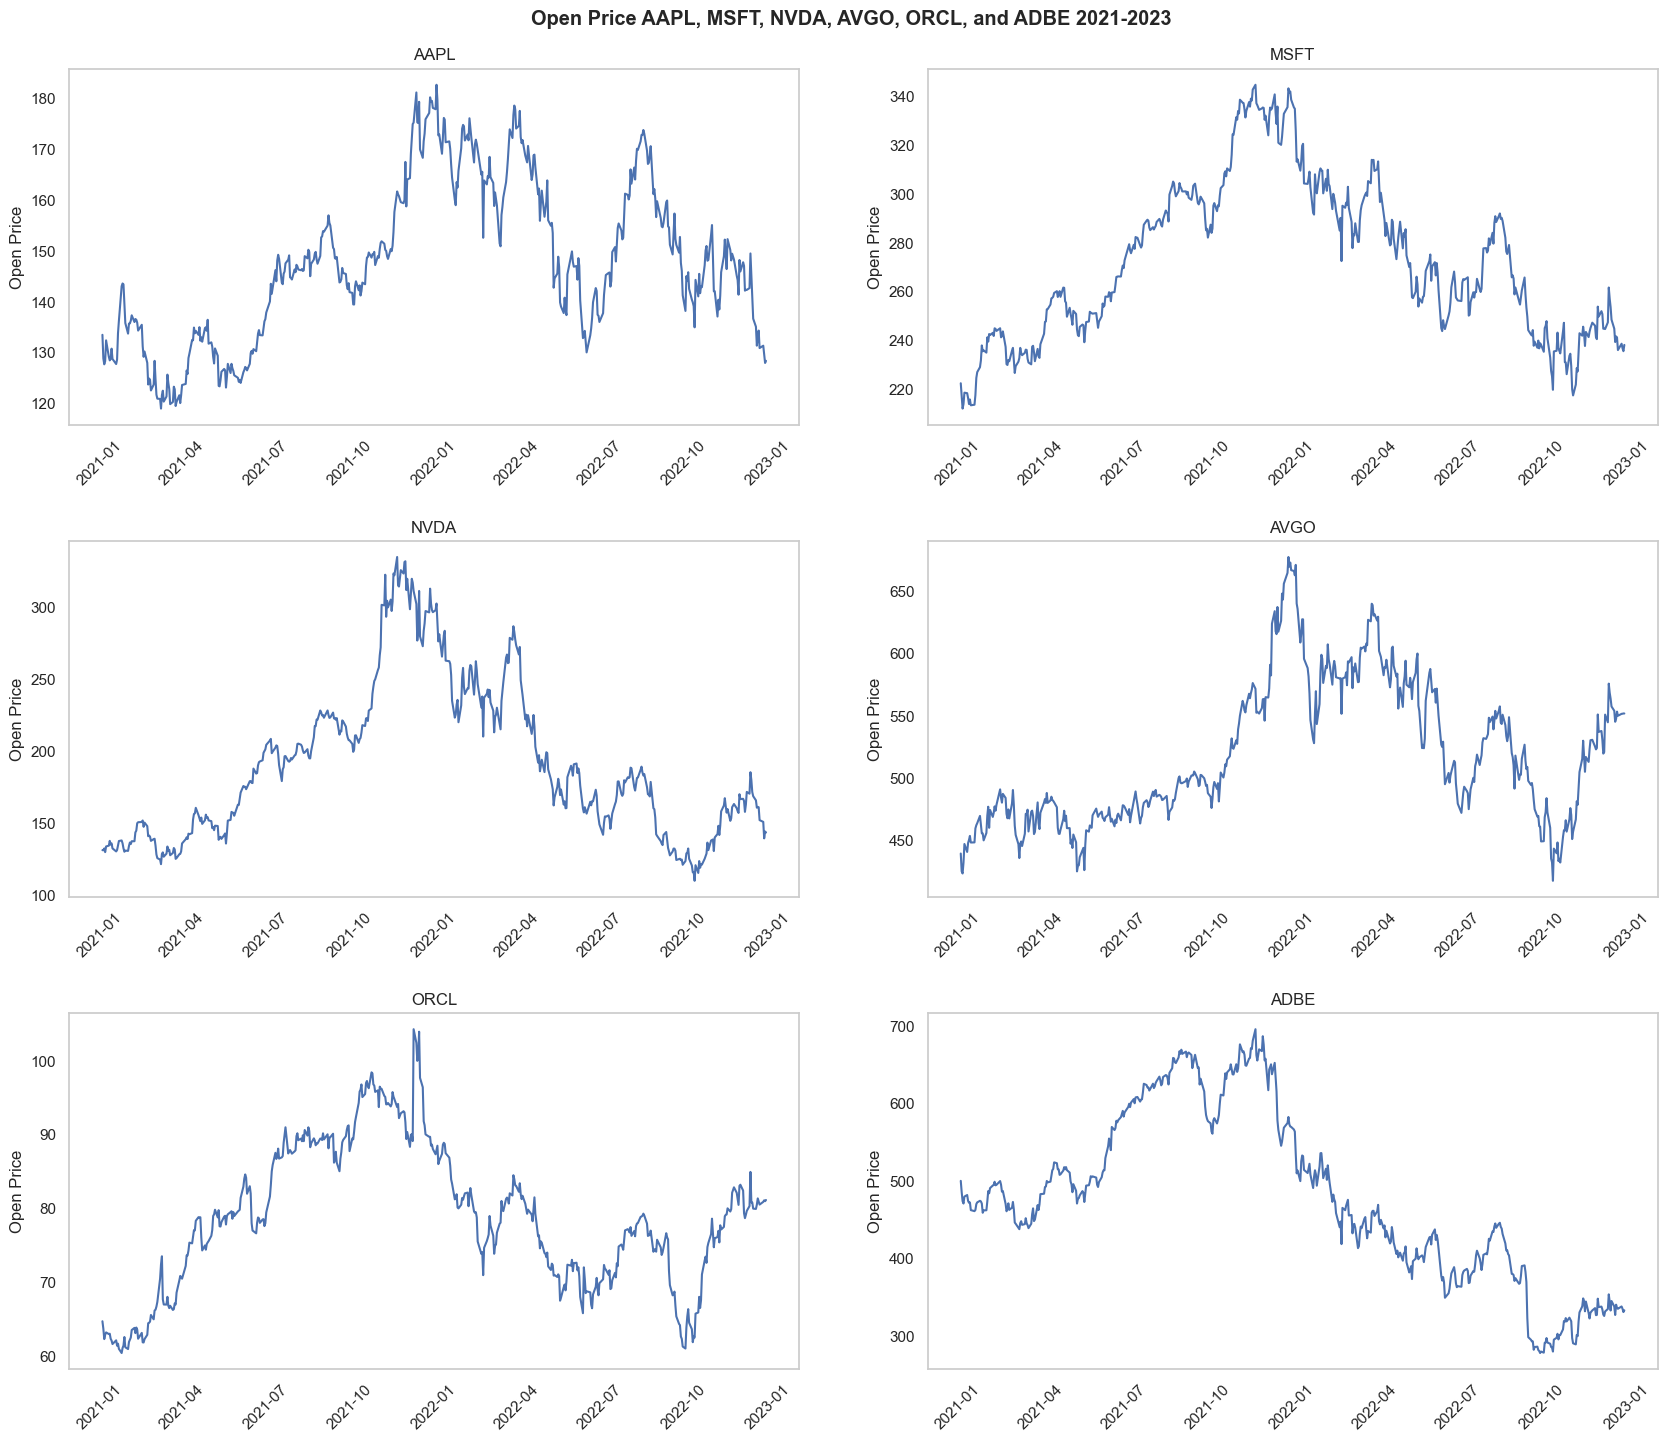

In [312]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Open' price
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Open',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Open Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [313]:
chart = f'Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, {stock_code[3]}, {stock_code[4]}, and {stock_code[5]} 2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Adj Close Price AAPL, MSFT, NVDA, AVGO, ORCL, and ADBE 2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\207423160.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5)


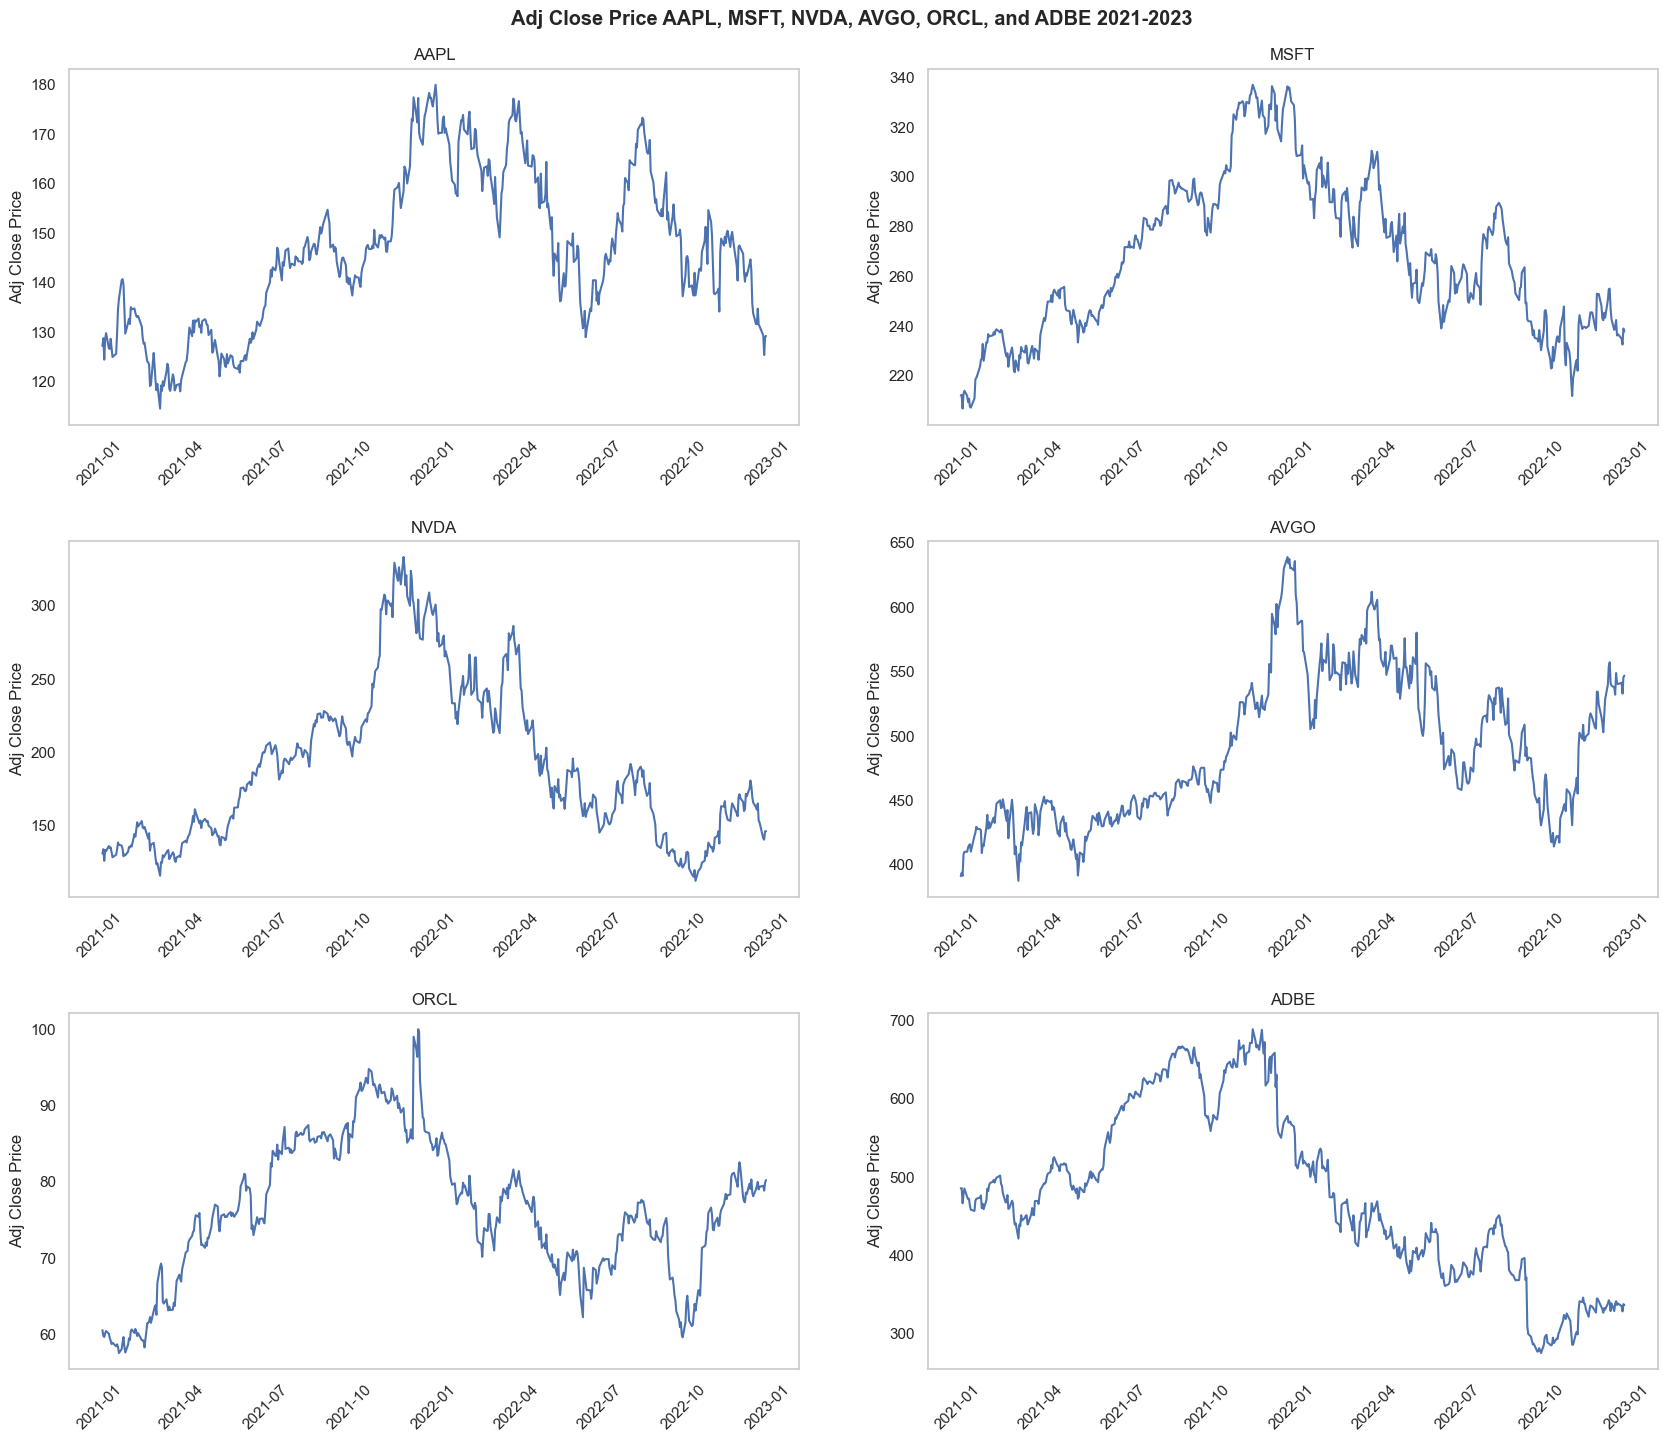

In [314]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Adj Close' price
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Adj Close',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Adj Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [315]:
chart = f'Open and Adj Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, {stock_code[3]}, {stock_code[4]}, and {stock_code[5]} 2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Open and Adj Close Price AAPL, MSFT, NVDA, AVGO, ORCL, and ADBE 2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\1038481083.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5)


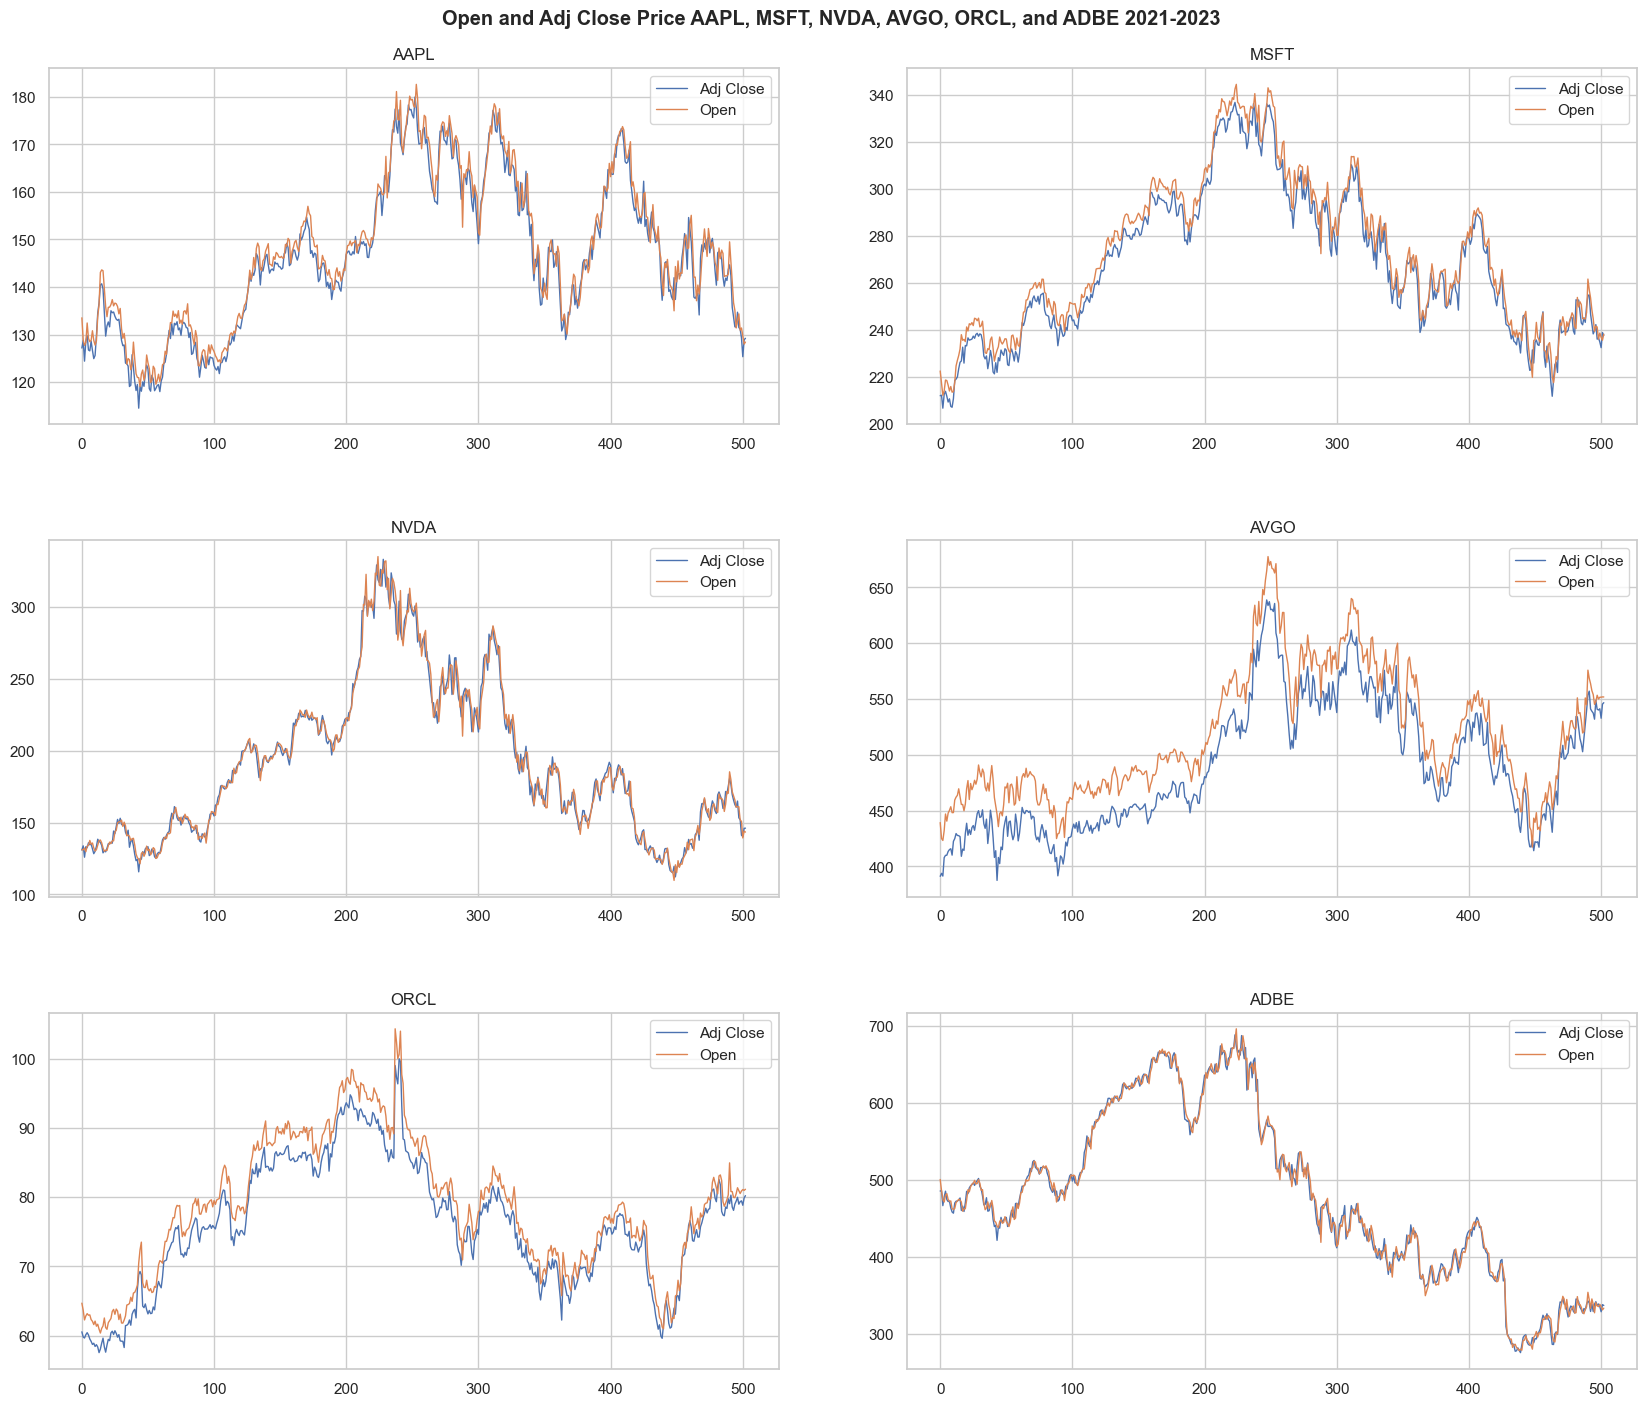

In [316]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Open' and 'Adj Close' price
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'Open']].plot(ax=ax, linewidth=1)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [317]:
chart = f' Volume {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, {stock_code[3]}, {stock_code[4]}, and {stock_code[5]} 2021-2023'

Markdown("""
### {title}
""".format(title=chart))


###  Volume AAPL, MSFT, NVDA, AVGO, ORCL, and ADBE 2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\1250071338.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5)


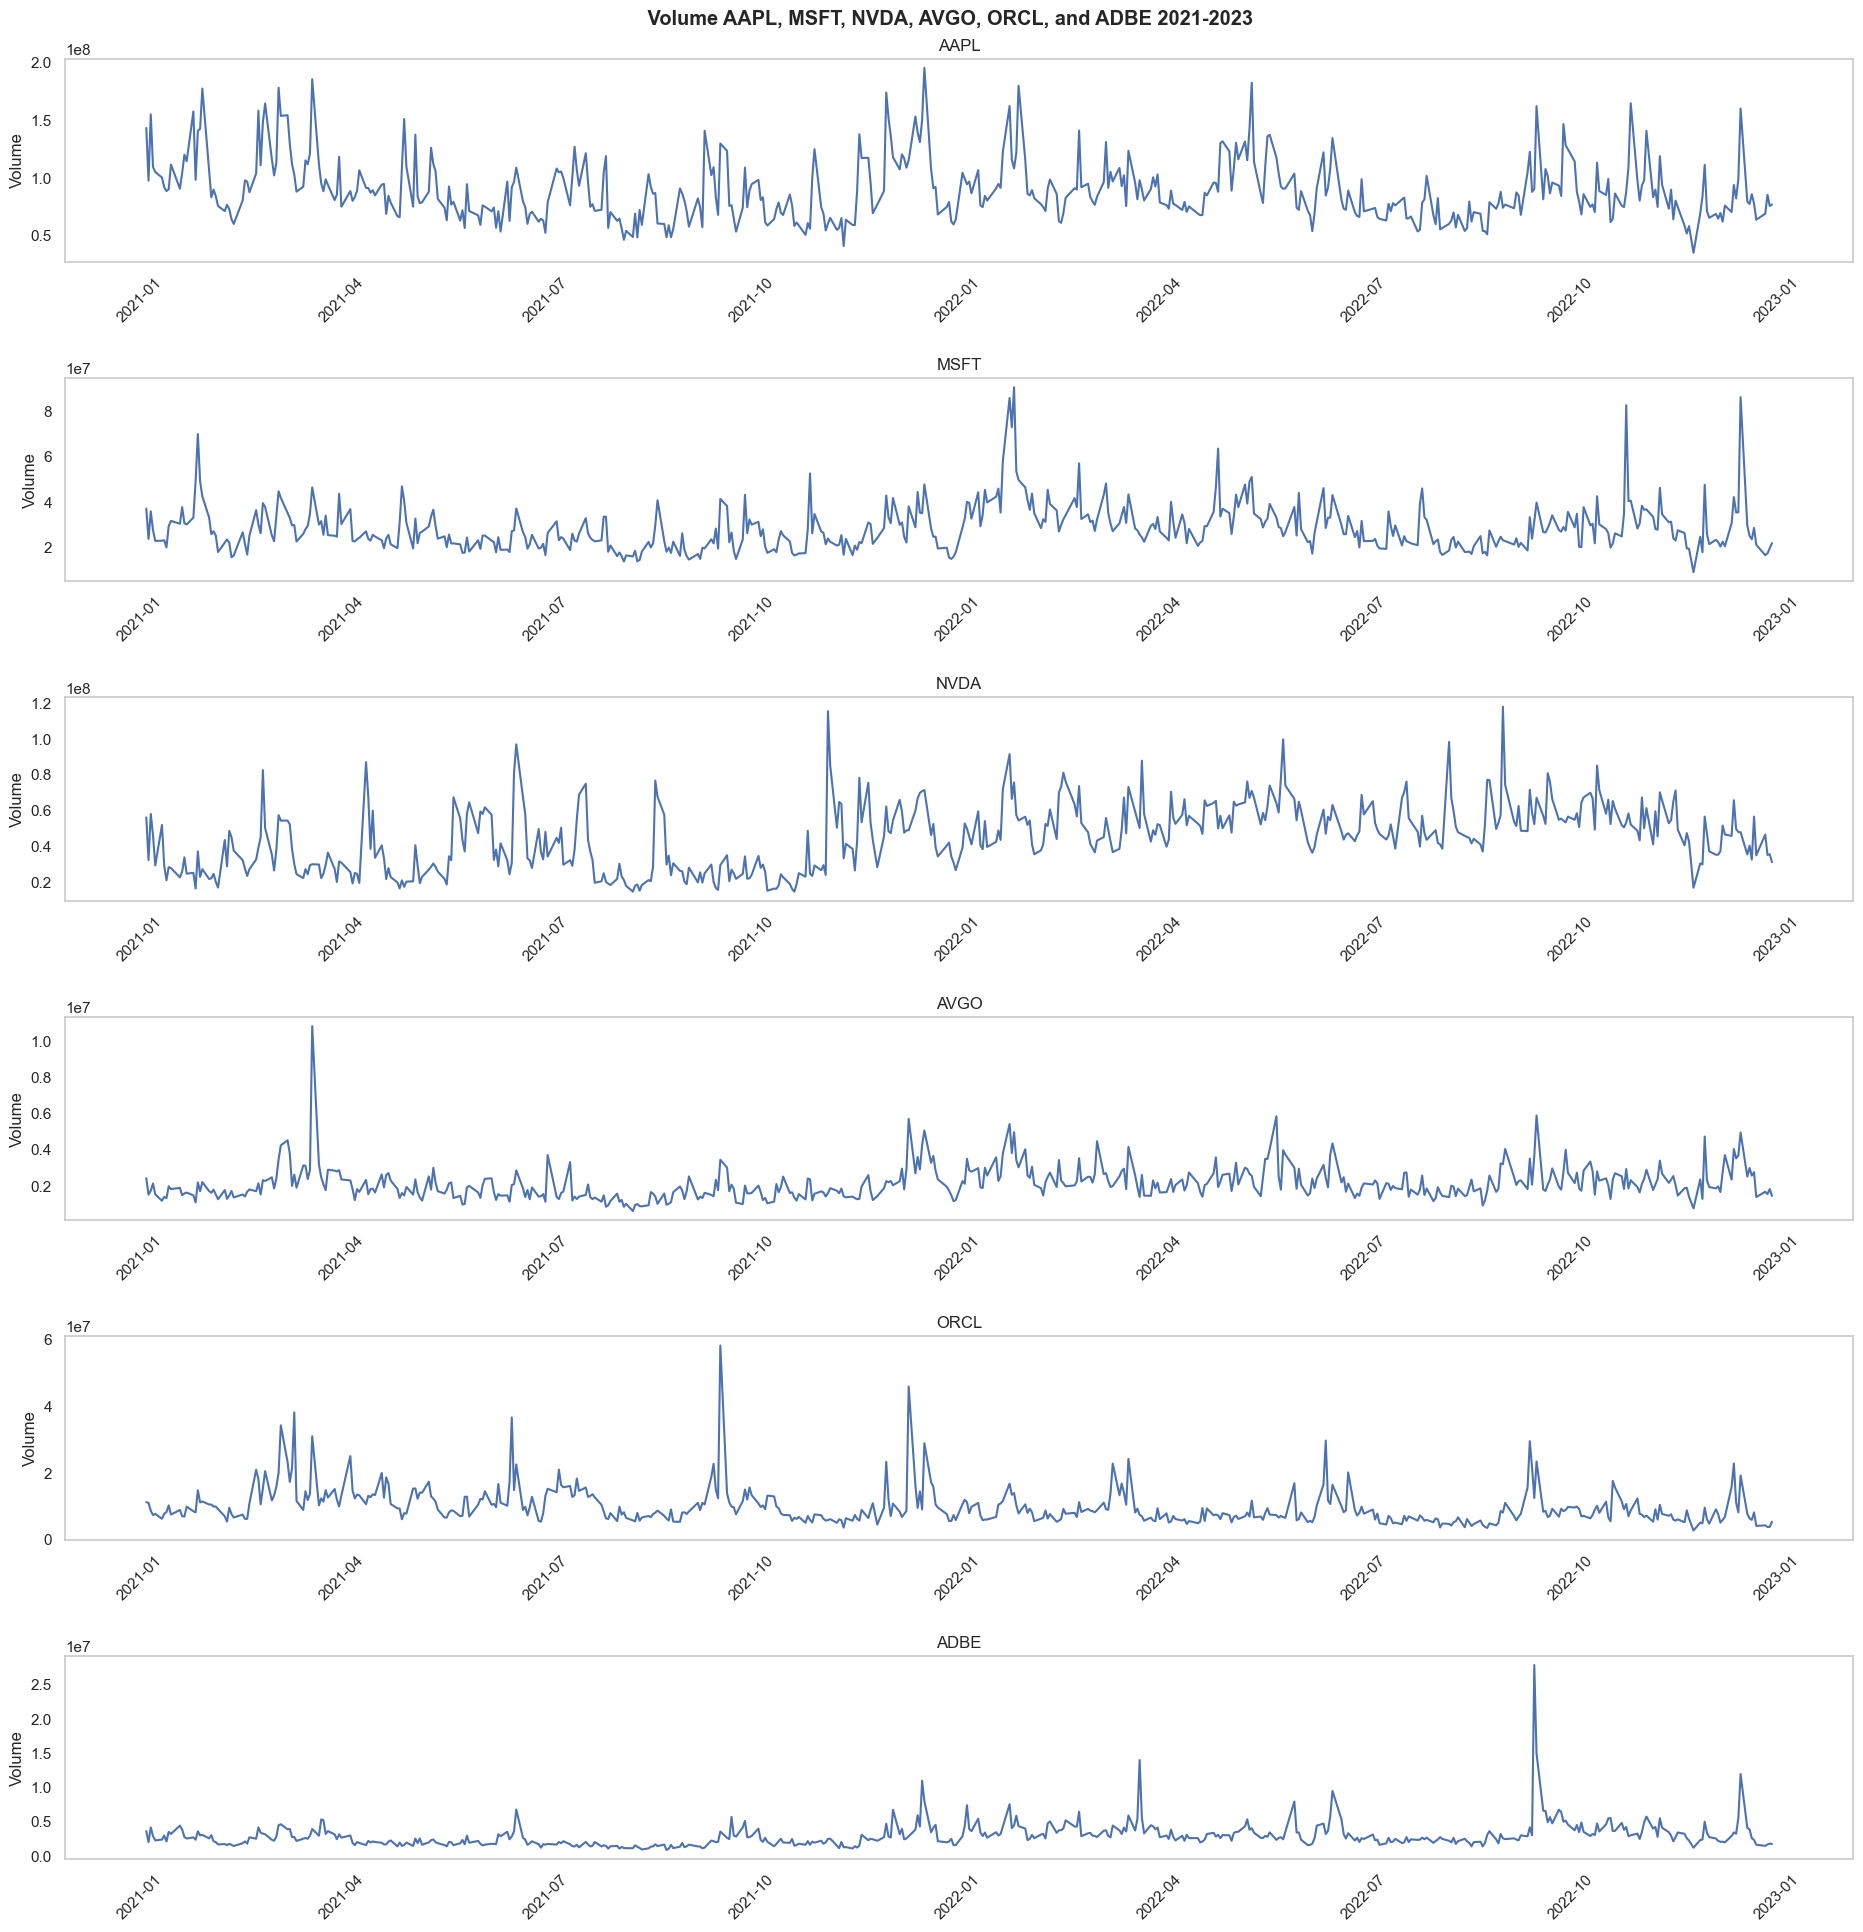

In [318]:
fig, axes = plt.subplots(6, 1, figsize=(20, 20))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot lineplot based on value of 'Volume' 
for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Volume',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [319]:
chart = 'Distribution of Adj Close Price 2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Distribution of Adj Close Price 2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\1585592533.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4)


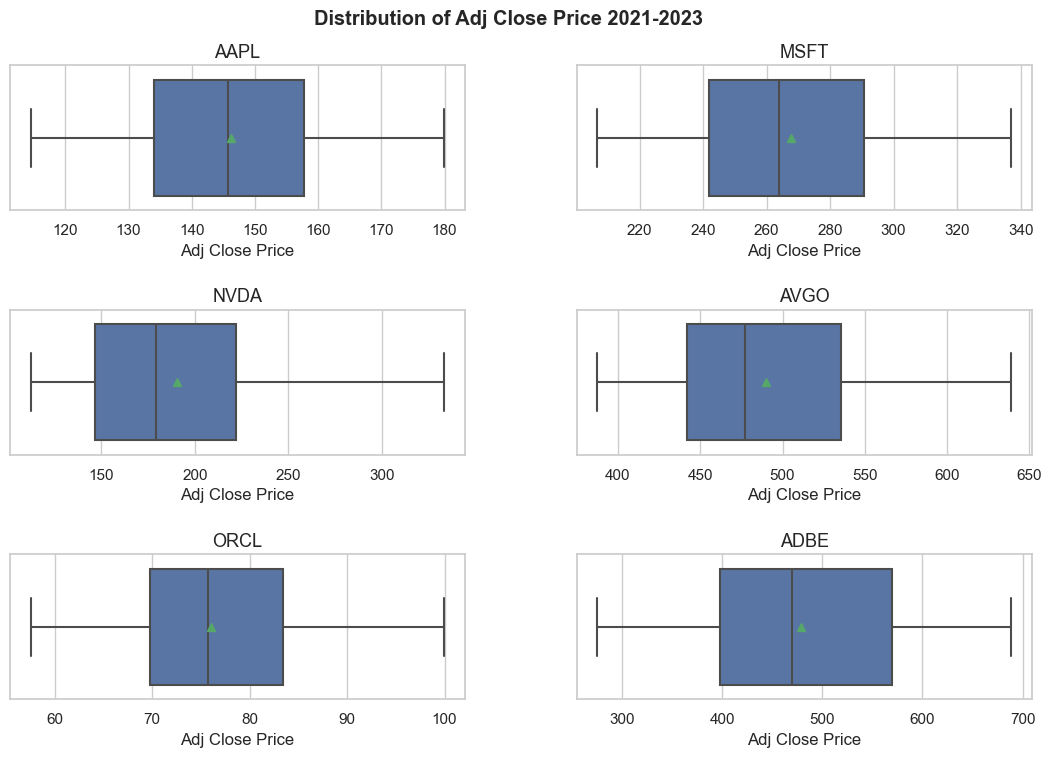

In [320]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

g_stock = ['g_aapl', 'g_msft', 'g_nvda', 'g_avgo', 'g_orcl', 'g_adbe', 'g_crm']

# plotting the subplot boxplot based on value of 'Open' price
for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Adj Close', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Adj Close Price', fontsize = 12)

plt.show()

In [321]:
chart = 'Distribution of Volume 2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Distribution of Volume 2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\1077460426.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4)


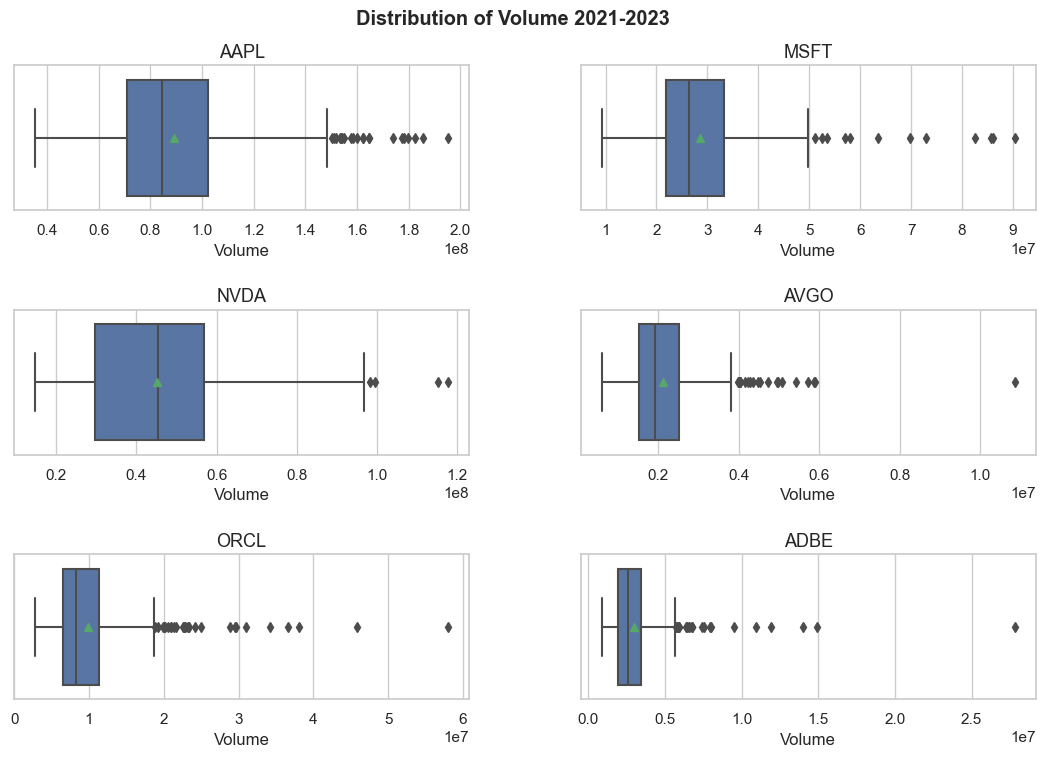

In [322]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

g_stock = ['g_aapl', 'g_msft', 'g_nvda', 'g_avgo', 'g_orcl', 'g_adbe', 'g_crm']

# plotting the subplot boxplot based on value of 'Volume' 
for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Volume', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Volume', fontsize = 12)

plt.show()

In [323]:
chart = 'Average Adj Close Price Per Month'

Markdown("""
### {title}
""".format(title=chart))


### Average Adj Close Price Per Month


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\1723052492.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4)


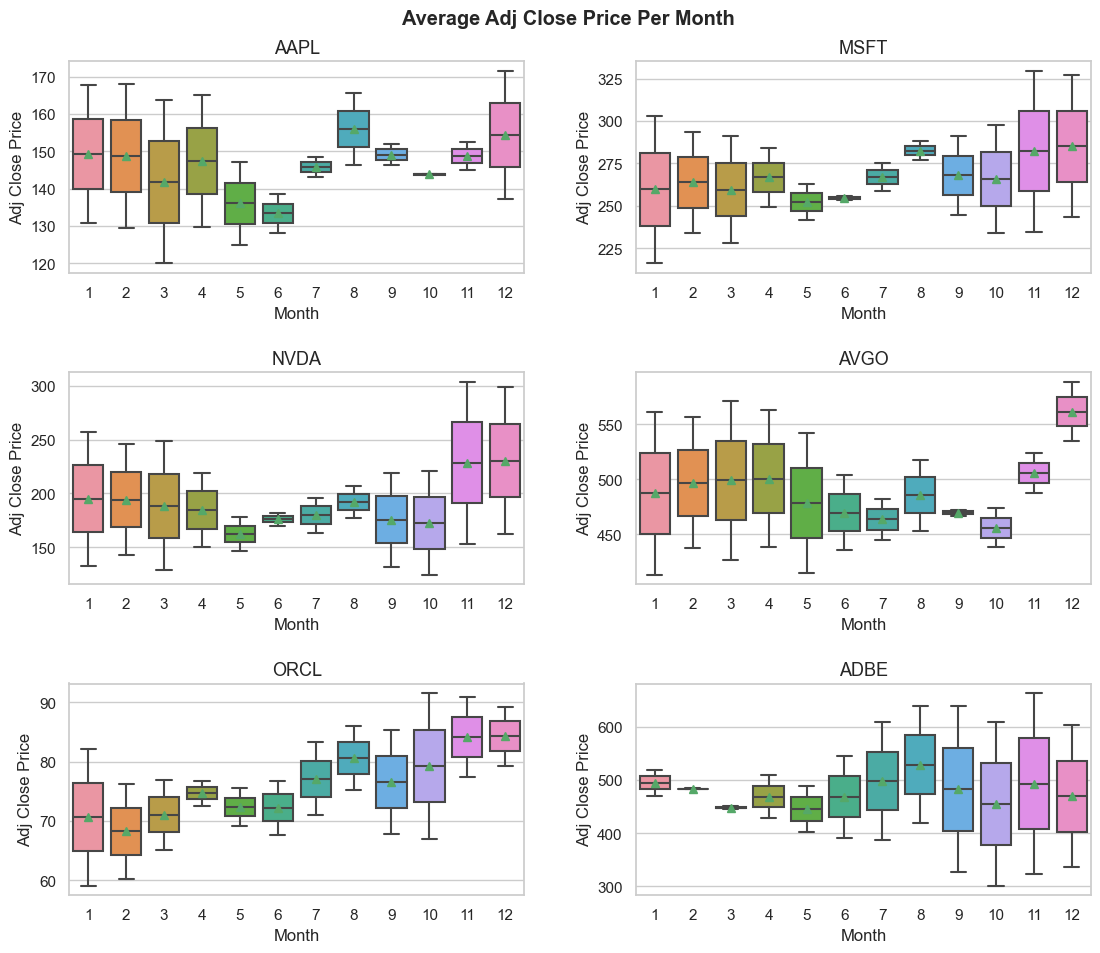

In [324]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

stock_resample = ['aapl_sample', 'msft_sample', 'nvda_sample', 'avgo_sample', 'orcl_sample', 'adbe_sample', 'crm_sample']

# resampling data to get the average value per month
for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot boxplot based on average value of 'Adj Close Price' per month
for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Adj Close",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Adj Close Price')
    
plt.show()

In [325]:
chart = 'Average Volume Per Month'

Markdown("""
### {title}
""".format(title=chart))


### Average Volume Per Month


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\3166896842.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4)


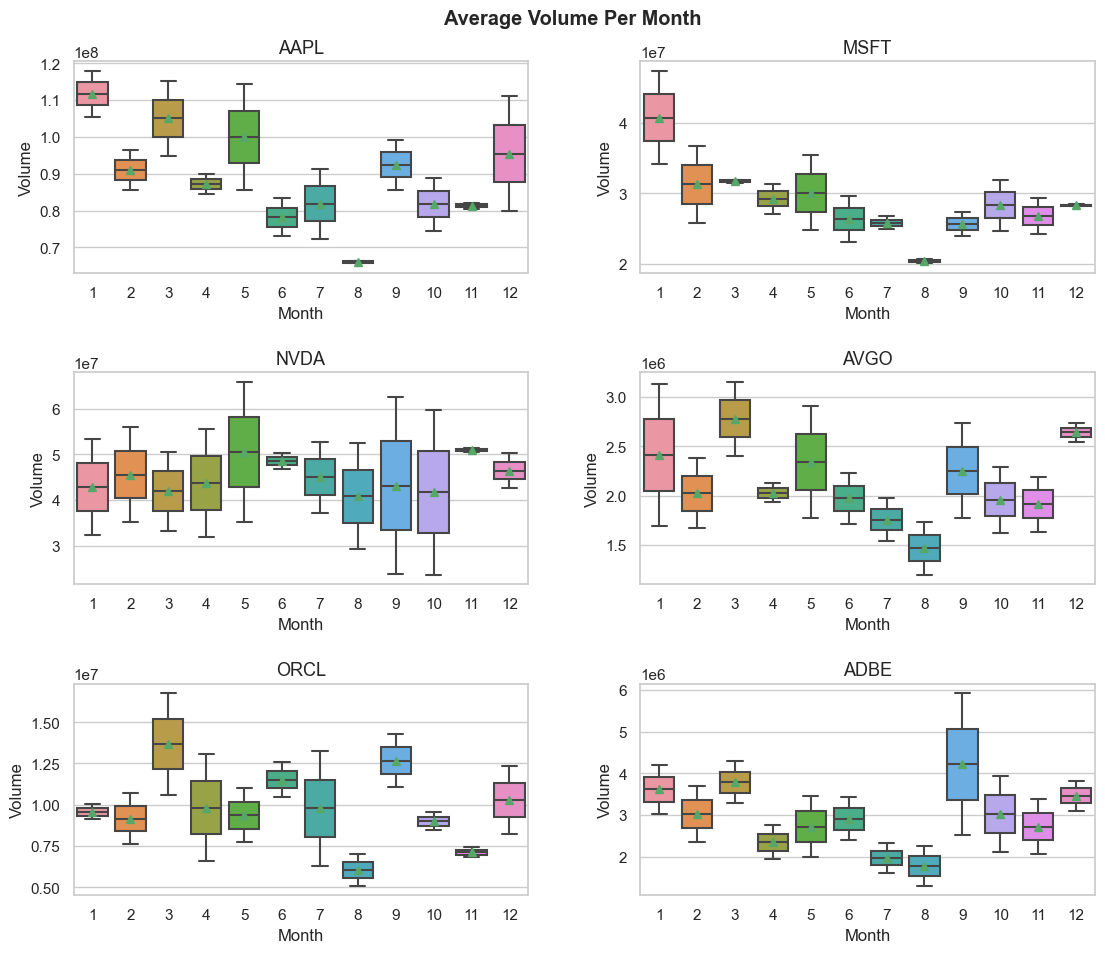

In [326]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

stock_resample = ['aapl_sample', 'msft_sample', 'nvda_sample', 'avgo_sample', 'orcl_sample', 'adbe_sample', 'crm_sample']

# resampling data to get the average value per month
for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot boxplot based on average value of 'Volume' per month
for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Volume",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Volume')
    
plt.show()

In [327]:
chart = 'Correlation of Month and Year Based on Average Closing Price'

Markdown("""
### {title}
""".format(title=chart))


### Correlation of Month and Year Based on Average Closing Price


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\2851126666.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4)


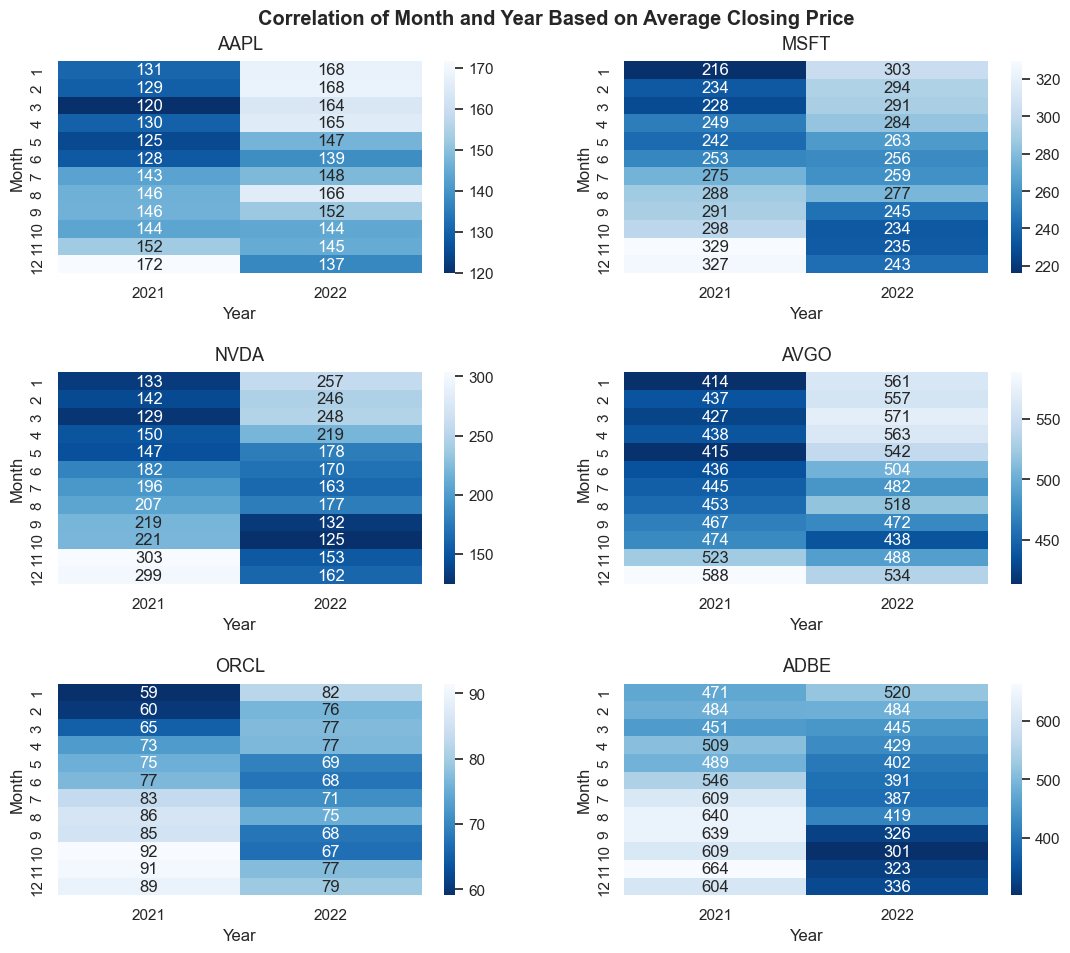

In [328]:
stock_pivot =['aapl_pivot', 'msft_pivot', 'nvda_pivot', 'avgo_pivot', 'orcl_pivot', 'adbe_pivot', 'crm_pivot']

# pivot data with 'Month'(Bulan) as index, 'Year'(Tahun) as columns, and 'Adj Close' as values
for x, y in zip(stock_pivot, stock_resample):
    globals()[y]["Bulan"] = globals()[y].index.month
    globals()[y]["Tahun"] = globals()[y].index.year
    globals()[x] = globals()[y].pivot(index="Bulan", columns="Tahun", values="Adj Close")

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

# plotting the subplot heatmap based on value of average 'Close' price to see correlation between Month, Year, and Close Price
for x, y, z, ax in zip(stock_pivot, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(data=globals()[x], annot=True, fmt=".0f", cmap = 'Blues_r', ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    y.set_xlabel('Year', fontsize = 12)
    y.set_ylabel('Month')
    
plt.show()

In [329]:
stocks_code = ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL', 'ADBE', 'CRM']

closing_df = yf.download(stocks_code, '2021-01-01' , '2023-12-31')['Adj Close']


# resampling data with percentage of change
stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%%**********************]  7 of 7 completed


,AAPL,ADBE,AVGO,CRM,MSFT,NVDA,ORCL
Date,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.000721,0.006773,0.005492,0.000965,0.022210,-0.012392
2021-01-06,-0.033661,-0.039902,-0.006167,-0.024242,-0.025929,-0.058953,-0.002392
2021-01-07,0.034123,0.024512,0.042143,0.008466,0.028457,0.057830,0.007991
2021-01-08,0.008631,0.015406,0.005075,0.018626,0.006093,-0.005040,0.004915


In [330]:
chart = 'Stocks Correlation Based on Percentage Change of Closing Price'

Markdown("""
### {title}
""".format(title=chart))


### Stocks Correlation Based on Percentage Change of Closing Price


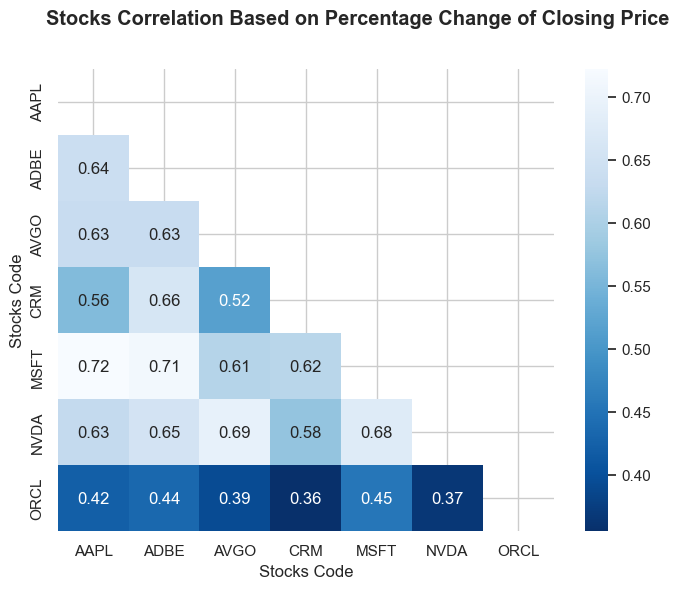

In [331]:
plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart}', fontweight='bold')

mask = np.triu(np.ones_like(stock_rets.corr()))
# plotting heatmap for shows percentage change of 'Close' price
g = sns.heatmap(stock_rets.corr(), annot=True, cmap = 'Blues_r', mask = mask)
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

In [332]:
chart = f'Moving Averages of {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, {stock_code[3]}, {stock_code[4]}, and {stock_code[5]}  2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Moving Averages of AAPL, MSFT, NVDA, AVGO, ORCL, and ADBE  2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\1102859766.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4)


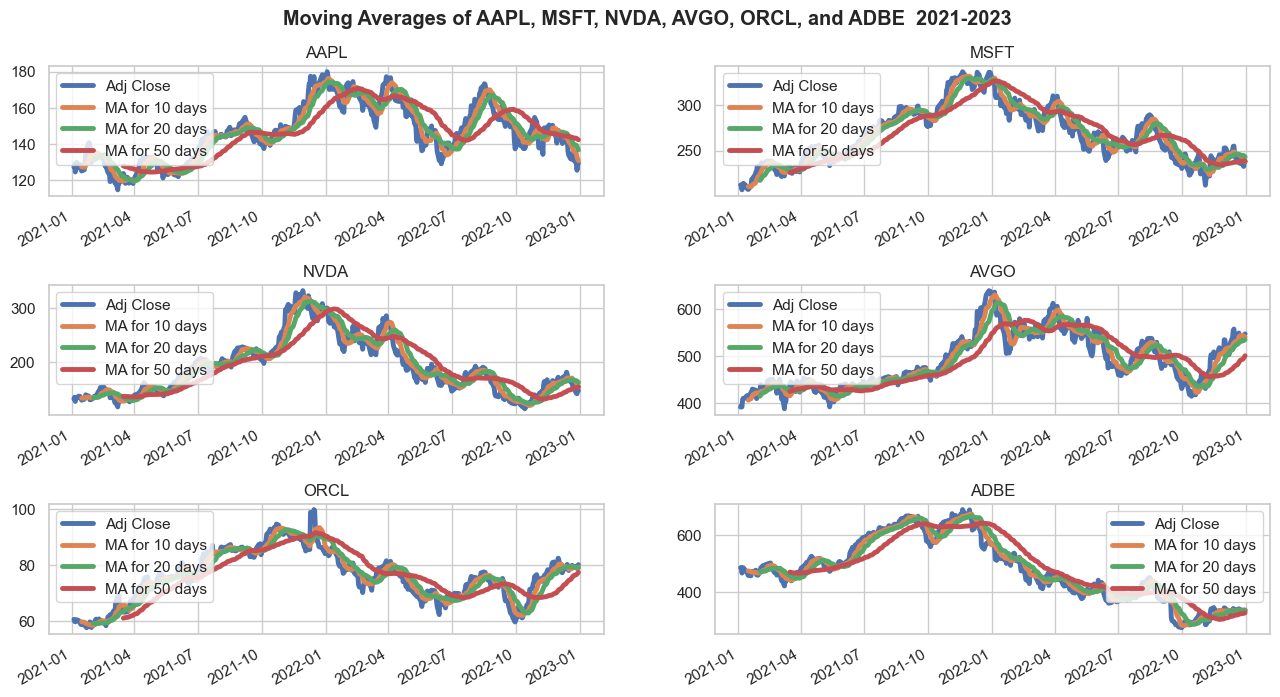

In [333]:
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart}', fontweight='bold')

# creat a list for ma range
# ma refers to moving averages
ma_day = [10, 20, 50]

# resampling data with rolling data as average of ma range days
for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# plotting the subplot lineplot based on value of 'Moving Averages'
for x, y, ax in zip(stock_ma, stock_code, axes.ravel()):
    globals()[x][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [334]:
chart = f'Outlier Detection {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, {stock_code[3]}, {stock_code[4]}, and {stock_code[5]}  2021-2023'

Markdown("""
### {title}
""".format(title=chart))


### Outlier Detection AAPL, MSFT, NVDA, AVGO, ORCL, and ADBE  2021-2023


C:\Users\mansi\AppData\Local\Temp\ipykernel_6140\380003176.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5)


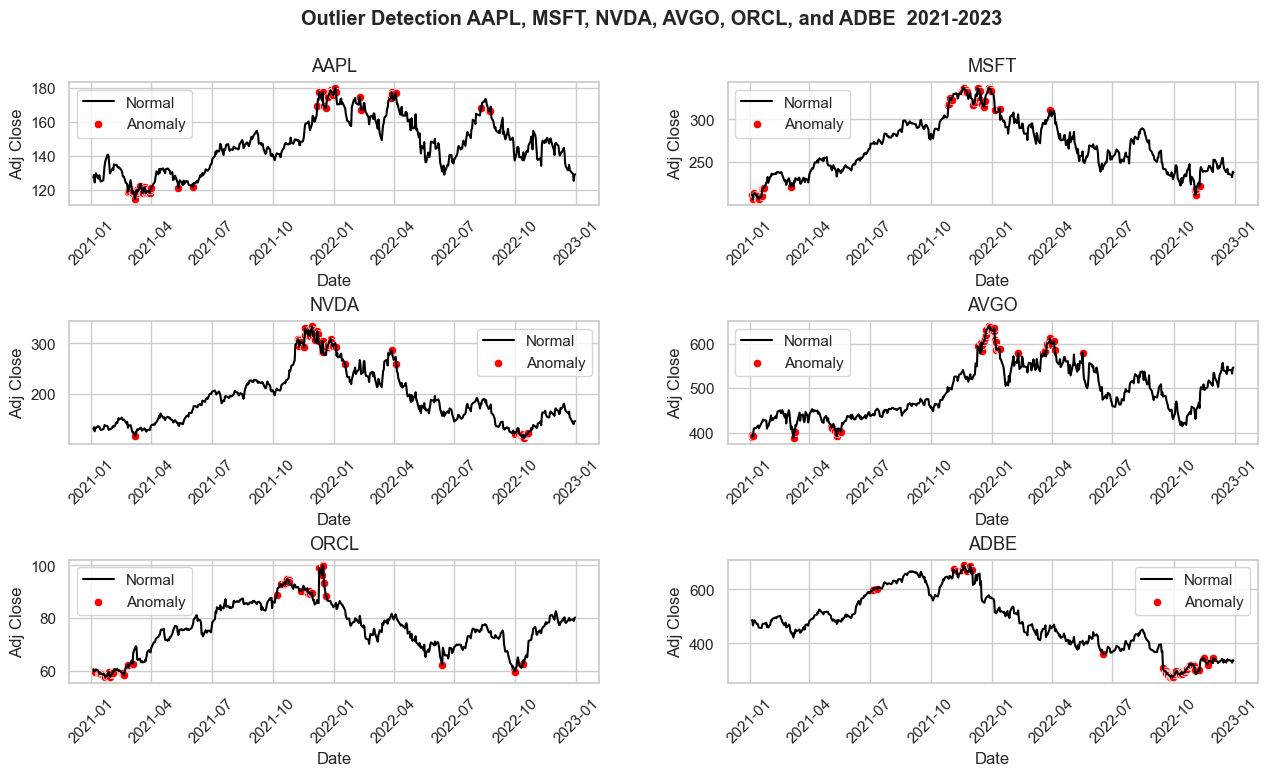

In [335]:
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart}', fontweight='bold')

# prediction of outlier(anomaly) using IsolationForest
for x in stock_ma:
    outliers_fraction = float(.09)
    scaler = StandardScaler()
    globals()[x]['Adj_Close'] = globals()[x]['Adj Close']
    np_scaled = scaler.fit_transform(globals()[x].Adj_Close.values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    globals()[x]['anomaly'] = model.predict(data) 

# plotting the subplots lineplot of outlier values
for x, y, ax in zip(stock_ma, stock_code, axes.flatten()):
    a = globals()[x].loc[globals()[x]['anomaly'] == -1, ['Adj Close']]
    g = sns.lineplot(data=globals()[x], x="Date", y='Adj Close', color='black', label = 'Normal', ax=ax)
    g.tick_params(axis='x', rotation=45)
    g.set_title(y, fontweight="normal", size=13, y=1.02)
    g2= sns.scatterplot(data=a,x=a.index,y=a['Adj Close'], color='red', label = 'Anomaly', ax=ax)

plt.show()

# Forecasting

In [336]:
chart = f'{stock_code[0]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### AAPL Forecasting


In [337]:
# create a new dataframe with only 'Adj Close' column
data = aapl_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.1933408 , 0.21736506, 0.1511469 , 0.21601364, 0.23298143,
       0.18688368, 0.18418107, 0.21556317, 0.18583304, 0.15925505,
       0.16961615, 0.23268112, 0.30535524, 0.33839011, 0.3961984 ,
       0.39980288, 0.38328556, 0.30865893, 0.23162978, 0.26436365,
       0.27712656, 0.26136003, 0.31316366, 0.3067724 , 0.30902803,
       0.29549427, 0.28617052, 0.28226036, 0.28586974, 0.25308738,
       0.21774768, 0.20075587, 0.2031613 , 0.14496491, 0.14285956,
       0.13519034, 0.06962515, 0.07368535, 0.17188262, 0.1317317 ,
       0.0857159 , 0.0566926 , 0.07609148, 0.        , 0.07112906,
       0.05443686, 0.08421176, 0.0702266 , 0.11473896, 0.13849858,
       0.12631799, 0.06270741, 0.05458725, 0.10571599, 0.09293407,
       0.05609104, 0.06360999, 0.07293351, 0.07564031, 0.05323374])]
[0.08706929697159893]

[array([0.1933408 , 0.21736506, 0.1511469 , 0.21601364, 0.23298143,
       0.18688368, 0.18418107, 0.21556317, 0.18583304, 0.15925505,
       0.16961615, 0.23268112, 0.30

In [338]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 780ms/step


5.516819671359142

In [339]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [340]:
chart = f'{stock_code[0]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### AAPL Forecasting Result


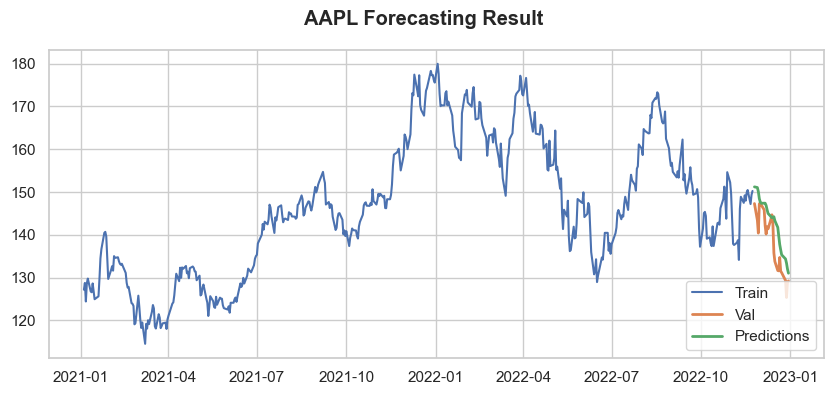

In [341]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [342]:
chart = f'{stock_code[1]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### MSFT Forecasting


In [343]:
# create a new dataframe with only 'Adj Close' column
data = msft_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.04067706, 0.04224736, 0.        , 0.0451636 , 0.05510854,
       0.03918174, 0.02003936, 0.03058275, 0.00575773, 0.00299099,
       0.03133035, 0.09040184, 0.09511286, 0.10244055, 0.12920984,
       0.15014653, 0.1544086 , 0.19949733, 0.14738002, 0.20488121,
       0.20383438, 0.22993059, 0.2225278 , 0.22394872, 0.22596752,
       0.2356882 , 0.22858476, 0.24107196, 0.24481079, 0.23516461,
       0.24310903, 0.24003626, 0.21890145, 0.17048594, 0.16119254,
       0.17078576, 0.12911576, 0.15452248, 0.18869795, 0.16568927,
       0.11839815, 0.11217752, 0.14867664, 0.11712415, 0.16501502,
       0.15482229, 0.19012204, 0.17977934, 0.17273449, 0.19446904,
       0.18944743, 0.14208144, 0.13930837, 0.18157823, 0.19349427,
       0.17760602, 0.15422266, 0.18525062, 0.17595722, 0.15055027])]
[0.17992931005839052]

[array([0.04067706, 0.04224736, 0.        , 0.0451636 , 0.05510854,
       0.03918174, 0.02003936, 0.03058275, 0.00575773, 0.00299099,
       0.03133035, 0.09040184, 0.09

In [344]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 697ms/step


6.291756963818644

In [345]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [346]:
chart = f'{stock_code[1]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### MSFT Forecasting Result


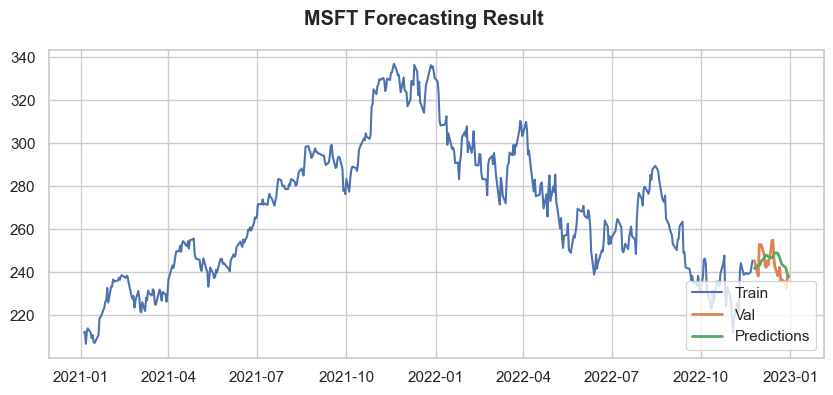

In [347]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [348]:
chart = f'{stock_code[2]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### NVDA Forecasting


In [349]:
# create a new dataframe with only 'Adj Close' column
data = nvda_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.08435698, 0.09750207, 0.06183541, 0.0947602 , 0.09172498,
       0.10728464, 0.10111274, 0.10323389, 0.08827231, 0.07289314,
       0.08037379, 0.09574178, 0.11838741, 0.11139179, 0.10871756,
       0.09887853, 0.07552209, 0.08153628, 0.07877163, 0.089931  ,
       0.10436214, 0.10317749, 0.10921404, 0.10590825, 0.14416987,
       0.13624886, 0.15886053, 0.18081787, 0.16775188, 0.18440597,
       0.16525835, 0.1617829 , 0.16618347, 0.14042358, 0.1307765 ,
       0.14688904, 0.09311269, 0.11148207, 0.1172252 , 0.09756972,
       0.07042208, 0.05081163, 0.0549301 , 0.01574316, 0.05777672,
       0.055429  , 0.07914339, 0.07293552, 0.08807166, 0.09258646,
       0.09484406, 0.06690805, 0.07247273, 0.08784582, 0.08263106,
       0.06331875, 0.05845394, 0.07217924, 0.07710038, 0.07364646])]
[0.09515991347959896]

[array([0.08435698, 0.09750207, 0.06183541, 0.0947602 , 0.09172498,
       0.10728464, 0.10111274, 0.10323389, 0.08827231, 0.07289314,
       0.08037379, 0.09574178, 0.11

In [350]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 684ms/step


10.986324369086153

In [351]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [352]:
chart = f'{stock_code[3]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### AVGO Forecasting Result


In [353]:
# create a new dataframe with only 'Adj Close' column
data = avgo_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.01453932, 0.02508691, 0.01541841, 0.0810834 , 0.08932368,
       0.08976311, 0.10305729, 0.10972261, 0.11287231, 0.09009246,
       0.13924067, 0.14879935, 0.16689085, 0.16029879, 0.15945676,
       0.15608705, 0.08588108, 0.1116635 , 0.10712228, 0.16659807,
       0.20373367, 0.16092154, 0.18084448, 0.1639246 , 0.18842569,
       0.1954935 , 0.17872026, 0.2092638 , 0.23830575, 0.24859687,
       0.22424254, 0.22709933, 0.25163663, 0.2018291 , 0.18549552,
       0.21838281, 0.13151318, 0.17806107, 0.25024498, 0.21702798,
       0.1531208 , 0.08181597, 0.10580402, 0.        , 0.08185254,
       0.05984195, 0.1188053 , 0.10957598, 0.18135716, 0.20849478,
       0.22830777, 0.15711277, 0.20845335, 0.21147986, 0.17006776,
       0.14500637, 0.16135732, 0.23643082, 0.2016623 , 0.14090943])]
[0.16859131997435162]

[array([0.01453932, 0.02508691, 0.01541841, 0.0810834 , 0.08932368,
       0.08976311, 0.10305729, 0.10972261, 0.11287231, 0.09009246,
       0.13924067, 0.14879935, 0.16

In [354]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 763ms/step


16.693465954036544

In [355]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [356]:
chart = f'{stock_code[3]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### AVGO Forecasting Result


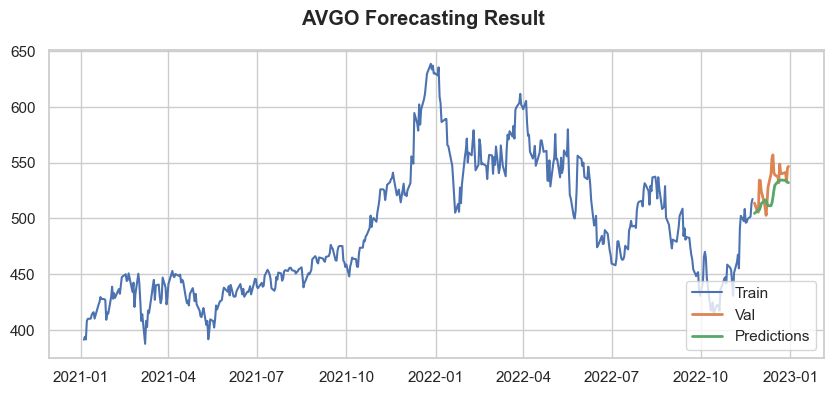

In [357]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [358]:
chart = f'{stock_code[4]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### ORCL Forecasting


In [359]:
# create a new dataframe with only 'Adj Close' column
data = orcl_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.07074131, 0.05305054, 0.04967878, 0.06091831, 0.06788675,
       0.06001916, 0.04630675, 0.03821451, 0.02787404, 0.03192029,
       0.0209056 , 0.02697489, 0.01910721, 0.        , 0.01213886,
       0.03236987, 0.04922912, 0.01933204, 0.00157373, 0.02585091,
       0.04518295, 0.04068712, 0.06721235, 0.07283207, 0.06181746,
       0.07440562, 0.06541405, 0.05260097, 0.06114305, 0.04001281,
       0.03888883, 0.03843943, 0.017309  , 0.0919391 , 0.09306317,
       0.09755891, 0.11104667, 0.09328818, 0.13060309, 0.14161815,
       0.14723778, 0.11801511, 0.21602332, 0.26525253, 0.27604249,
       0.26435375, 0.15847713, 0.15285759, 0.1656705 , 0.14588888,
       0.13172752, 0.14341618, 0.13262622, 0.13397494, 0.15533002,
       0.14543904, 0.18590142, 0.2223179 , 0.2420988 , 0.22906124])]
[0.2205194248078699]

[array([0.07074131, 0.05305054, 0.04967878, 0.06091831, 0.06788675,
       0.06001916, 0.04630675, 0.03821451, 0.02787404, 0.03192029,
       0.0209056 , 0.02697489, 0.019

In [360]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 2s 2s/step


4.385595342698485

In [361]:
# assign result of forecasting into a new dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [362]:
chart = f'{stock_code[3]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### AVGO Forecasting Result


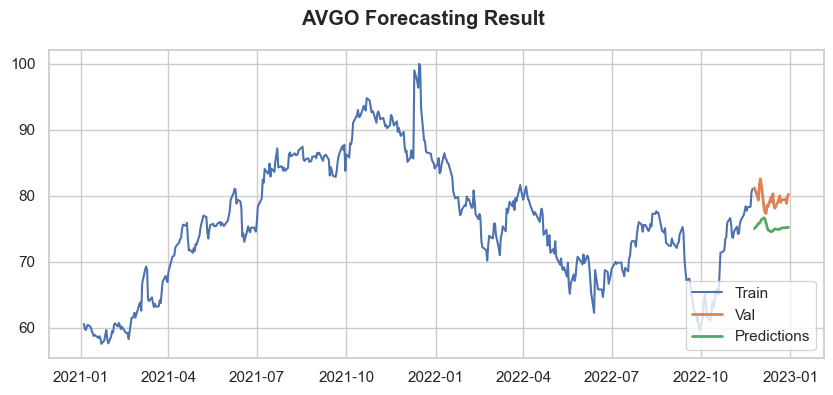

In [363]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [364]:
chart = f'{stock_code[5]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### ADBE Forecasting


In [365]:
# create a new dataframe with only 'Adj Close' column
data = adbe_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.50860419, 0.50945131, 0.46254567, 0.49020981, 0.50802334,
       0.48173872, 0.47547012, 0.47643823, 0.4551879 , 0.44262648,
       0.43880242, 0.47082316, 0.47636562, 0.47738219, 0.4798025 ,
       0.48667617, 0.44727351, 0.46099671, 0.4442965 , 0.47147662,
       0.50761185, 0.50032677, 0.51838227, 0.5250139 , 0.52898324,
       0.5345257 , 0.52634511, 0.5359053 , 0.54127839, 0.54805531,
       0.52285986, 0.51593773, 0.49354985, 0.46501436, 0.46615191,
       0.48749907, 0.44524046, 0.44647484, 0.47043591, 0.46322335,
       0.41931894, 0.39659218, 0.40087611, 0.35336546, 0.39688261,
       0.39163057, 0.42563592, 0.40927459, 0.41723744, 0.42437738,
       0.42551493, 0.39688261, 0.40249775, 0.42890335, 0.4477576 ,
       0.42672509, 0.42546648, 0.46927413, 0.46983083, 0.46048839])]
[0.484473681994665]

[array([0.50860419, 0.50945131, 0.46254567, 0.49020981, 0.50802334,
       0.48173872, 0.47547012, 0.47643823, 0.4551879 , 0.44262648,
       0.43880242, 0.47082316, 0.4763

In [366]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 696ms/step


6.0604721074896934

In [367]:
# assign result of forecasting into a new dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [368]:
chart = f'{stock_code[5]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### ADBE Forecasting Result


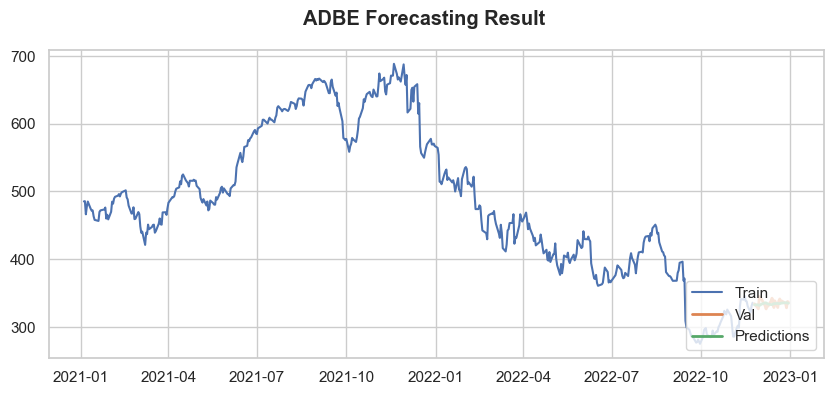

In [369]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [370]:
chart = f'{stock_code[6]} Forecasting'

Markdown("""
### {title}
""".format(title=chart))


### CRM Forecasting


In [371]:
# create a new dataframe with only 'Adj Close' column
data = crm_ma.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model (get 95%)
training_data_len = int(np.ceil( len(dataset) * .95 ))

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset and split the data into x_train and y_train
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# convert the x_train and y_train to numpy arrays and reshape data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model using 'mean_squared_error' and train the model using x_train and y_train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.50657714, 0.51323687, 0.48368097, 0.49375308, 0.51609883,
       0.49523916, 0.48021358, 0.49485384, 0.4806539 , 0.46711432,
       0.48703834, 0.52380431, 0.51681436, 0.53662836, 0.53745391,
       0.53932521, 0.53117949, 0.54064617, 0.53547251, 0.55143381,
       0.58302603, 0.5864385 , 0.6038307 , 0.60883925, 0.60905937,
       0.59678574, 0.59689584, 0.6217734 , 0.61698497, 0.66222687,
       0.6571083 , 0.65353073, 0.651054  , 0.62017723, 0.59095164,
       0.61753539, 0.56585395, 0.48560736, 0.49133136, 0.46893061,
       0.42781662, 0.42412903, 0.45401506, 0.4372833 , 0.45825307,
       0.46061978, 0.48258021, 0.46199575, 0.46524302, 0.4744895 ,
       0.46700422, 0.4469701 , 0.46194066, 0.47828719, 0.47735154,
       0.44724531, 0.42473446, 0.44482359, 0.45407015, 0.44983214])]
[0.4601243697634252]

[array([0.50657714, 0.51323687, 0.48368097, 0.49375308, 0.51609883,
       0.49523916, 0.48021358, 0.49485384, 0.4806539 , 0.46711432,
       0.48703834, 0.52380431, 0.516

In [372]:
# create the testing dataset 
# create the dataset x_test and y_test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a nummpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 688ms/step


12.196831459381368

In [373]:
# assign result of forecasting into a new dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.assign(Predictions=predictions)

In [374]:
chart = f'{stock_code[6]} Forecasting Result'

Markdown("""
### {title}
""".format(title=chart))


### CRM Forecasting Result


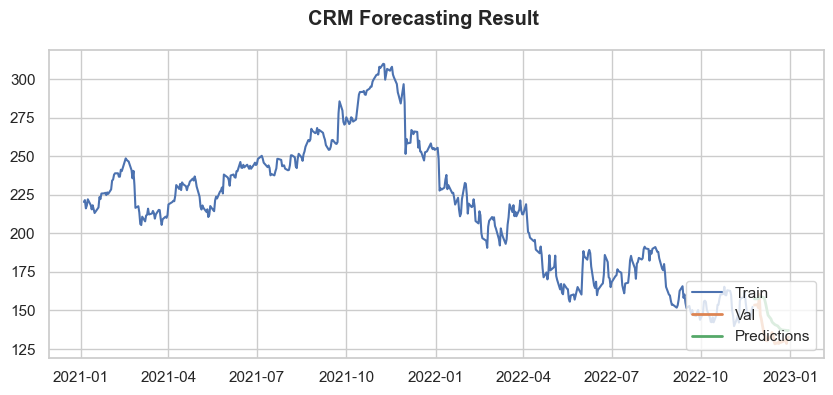

In [375]:
plt.figure(figsize=(10, 4))

plt.suptitle(f'{chart}', fontweight='bold')

plt.plot(train[['Adj Close']])
plt.plot(valid[['Adj Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()